In [1]:
import os
import numpy as np
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import pandas as pd 
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
import tensorflow
from keras.preprocessing import image
import tensorflow.compat.v2 as tf
import keras.utils as image

In [3]:
import os
import numpy as np
import shutil
import random
from PIL import Image
#importing libraries to sample the images
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
root_dir = r"C:\Users\HP\Downloads\autism"
autistic_dir = r"C:\Users\HP\Downloads\autism\train\autistic"
nonautistic_dir = r"C:\Users\HP\Downloads\autism\train\non_autistic"
test_dir=r"C:\Users\HP\Downloads\autism\test"
autistic_dir_names = os.listdir(autistic_dir)
nonautistic_dir_names = os.listdir(nonautistic_dir)
train_dir=r"C:\Users\HP\Downloads\autism\train"
val_dir=r"C:\Users\HP\Downloads\autism\valid"

In [5]:
r=Image.open(r"C:\Users\HP\Downloads\autism\train\autistic\0051.jpg")

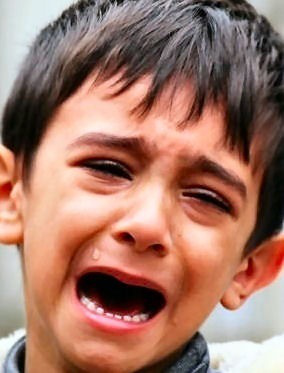

In [6]:
r

In [7]:
print(r.width)

284


In [8]:
print(r.height)

373


In [9]:
width = r.width
height = r.height
print(width)
print(height)

284
373


In [10]:

#Importing the tensorflow and keras libraries 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [11]:
# Using the pretrained InceptionV3 Model
pre_trained_model = InceptionV3(input_shape=(299,299,3),
                                include_top=False,
                                weights ='imagenet')

In [12]:
# Not training the upper layers
for layer in pre_trained_model.layers:
  layer.trainable=False


In [13]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [14]:
from tensorflow.keras.optimizers import Adam
X = layers.Flatten()(pre_trained_model.output)
X = layers.Dense(1024,activation='relu')(X)
X = layers.Dropout(0.2)(X)
X = layers.Dense(1,activation='sigmoid')(X)
model = Model(pre_trained_model.input,X)
model.compile(optimizer = Adam(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['acc'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [16]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (299, 299))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'binary', 
                                                          target_size = (299, 299))

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [17]:
t_img,label=train_generator.next()

In [18]:
print(r.width)

284


In [19]:
t_img

array([[[[0.4362745 , 0.38749996, 0.22279409],
         [0.4334289 , 0.383943  , 0.2192371 ],
         [0.43058333, 0.38038602, 0.21568012],
         ...,
         [0.53348076, 0.5060298 , 0.29034343],
         [0.49542964, 0.47625673, 0.26012835],
         [0.48771954, 0.4758075 , 0.28379798]],

        [[0.45489988, 0.40784103, 0.2478402 ],
         [0.45134288, 0.40428406, 0.2428604 ],
         [0.4477859 , 0.4007271 , 0.23788063],
         ...,
         [0.5281003 , 0.5018122 , 0.28554448],
         [0.49149886, 0.4729811 , 0.26209375],
         [0.4968914 , 0.48759985, 0.29296982]],

        [[0.46774346, 0.42818213, 0.2688202 ],
         [0.46632066, 0.42462513, 0.2659746 ],
         [0.46489787, 0.42106816, 0.26312903],
         ...,
         [0.52220416, 0.4972263 , 0.28030345],
         [0.48756805, 0.4697054 , 0.26405913],
         [0.5060632 , 0.4993922 , 0.30214167]],

        ...,

        [[0.26666668, 0.20392159, 0.15294118],
         [0.26666668, 0.20392159, 0.15294118]

In [21]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 50,
            validation_steps=4,
            verbose=1)

Epoch 1/50
79/79 [==============================] - 461s 6s/step - loss: 15.5362 - acc: 0.6671 - val_loss: 4.7636 - val_acc: 0.6641
Epoch 2/50
79/79 [==============================] - 444s 6s/step - loss: 2.3743 - acc: 0.6710 - val_loss: 0.5769 - val_acc: 0.6641
Epoch 3/50
79/79 [==============================] - 446s 6s/step - loss: 0.5466 - acc: 0.7352 - val_loss: 0.5799 - val_acc: 0.6719
Epoch 4/50
79/79 [==============================] - 446s 6s/step - loss: 0.5064 - acc: 0.7514 - val_loss: 0.5081 - val_acc: 0.7891
Epoch 5/50
79/79 [==============================] - 446s 6s/step - loss: 0.5025 - acc: 0.7585 - val_loss: 0.5605 - val_acc: 0.7344
Epoch 6/50
79/79 [==============================] - 388s 5s/step - loss: 0.5093 - acc: 0.7538 - val_loss: 0.5015 - val_acc: 0.7656
Epoch 7/50
79/79 [==============================] - 214s 3s/step - loss: 0.4933 - acc: 0.7712 - val_loss: 0.5791 - val_acc: 0.7109
Epoch 8/50
79/79 [==============================] - 207s 3s/step - loss: 0.4877 - 

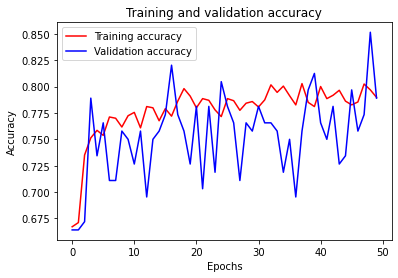

<Figure size 432x288 with 0 Axes>

In [32]:
# Ploting the accuracy Curve
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()


plt.show()  

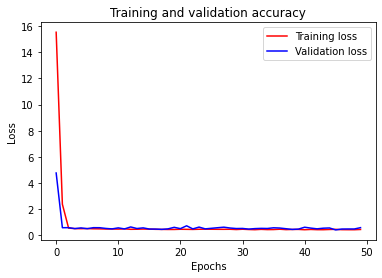

<Figure size 432x288 with 0 Axes>

In [33]:
# Ploting the accuracy Curve
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.figure()


plt.show()  

In [34]:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(299, 299),
    #color_mode="rgb",
    batch_size=1,
    class_mode='binary'
    #shuffle=False,
    #seed=42
)

Found 200 images belonging to 2 classes.


In [35]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

C:\Users\HP\AppData\Local\Temp/ipykernel_5684/2987361598.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


200/200 [==============================] - 27s 134ms/step


In [36]:
pred[0]

array([0.645458], dtype=float32)

In [37]:
pred[1]

array([0.5672625], dtype=float32)

In [38]:
predicted_class_indices = [ ]
for i in pred:
	if i > 0.5:
		predicted_class_indices.append(1)
	else:
		predicted_class_indices.append(0)
print(predicted_class_indices)
predicted_class_indices= np.array(predicted_class_indices)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})


[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1]


In [39]:
labels

{0: 'autistic', 1: 'non_autistic'}

In [40]:
results

,Filename,Predictions
0,autistic\001.jpg,non_autistic
1,autistic\002.jpg,non_autistic
2,autistic\003.jpg,non_autistic
3,autistic\004.jpg,non_autistic
4,autistic\005.jpg,non_autistic
...,...,...
195,non_autistic\096.jpg,non_autistic
196,non_autistic\097.jpg,non_autistic
197,non_autistic\098.jpg,autistic
198,non_autistic\099.jpg,autistic


In [31]:
for i in range(1,test_list+1):
    test_non_autistic="/autism/test/non_autistic/"+str(i).zfill(3)+'.jpg'
    test_autistic="/autism/test/autistic/"+str(i).zfill(2)+'.jpg'
    print(test_non_autistic)

NameError: name 'test_list' is not defined

In [41]:
test_list = 200

l=[]
counter = 0
for i in range(1,test_list+1):
    #test_non_autistic="autism/test/non_autistic/"+str(i).zfill(3)+'.jpg'
    test_autistic="autism/test/autistic/"+str(i).zfill(3)+'.jpg'
    if counter<100:
        l.append(0)
    else:
        l.append(1)
    counter+=1
print(l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [42]:
len(l)

200

In [43]:
from keras.preprocessing import image

In [44]:
from sklearn.metrics import classification_report,accuracy_score, f1_score,confusion_matrix
cm = confusion_matrix(l,predicted_class_indices)
print('Confusion Matrix: ',cm)

Confusion Matrix:  [[45 55]
 [44 56]]


<AxesSubplot:title={'center':'InceptionV3'}>

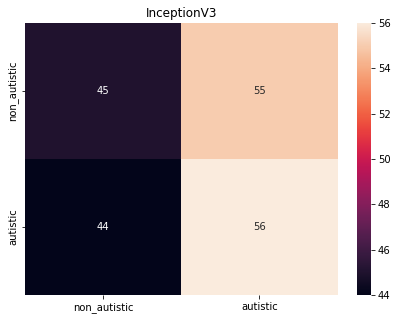

In [47]:
dp_cm = pd.DataFrame(cm, index = [i for i in ["non_autistic","autistic"]],columns = [i for i in ["non_autistic","autistic"]])
plt.figure(figsize = (7,5))
plt.title("InceptionV3")
sns.heatmap(dp_cm, annot=True ,fmt='g')

In [46]:
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, f1_score,confusion_matrix


In [ ]:
import tensorflow.compat.v2 as tf

In [ ]:
import keras.utils as image

In [48]:
    print(classification_report(l, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.51      0.45      0.48       100
           1       0.50      0.56      0.53       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

